# MNIST Handweitten Digit Classification using Deep Learning (Neural Network)

Importing Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the MNIST dta from keras dataset

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


Testing data = 60,000 images

Test data=10,000 images


Image dimension -> 28X28

Grayscale Image -> 1 Channel

In [6]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(x_train[10].shape)

(28, 28)


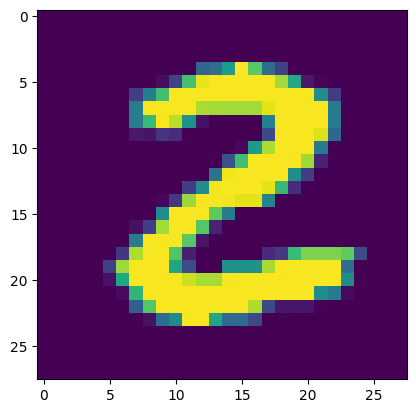

2


In [8]:
# displaying the image

plt.imshow(x_train[25])
plt.show()

# print corresponding labels
print(y_train[25])

Image Labels

In [9]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [10]:
# unique value in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply one Hot Encoding

All the images have same dimention in the dataset. If not then we have to resize all the images to a common dimension

In [11]:
# scaling the values
x_train = x_train/255
x_test = x_test/255

In [12]:
# printing 10th image
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [13]:
# Setting up the layers for the neural network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(100,activation="sigmoid"),
    keras.layers.Dense(10,activation='sigmoid')

])

In [14]:
# compiling the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
# training the neural network

model.fit(x_train,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2209 - accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0838 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0582 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0328 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0226 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 18s 9ms/ste

Triaining data accuracy = 99.4%

**Accuracy on testing data**

In [16]:
loss, accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9819
0.9818999767303467


Test data accuracy : 97.4

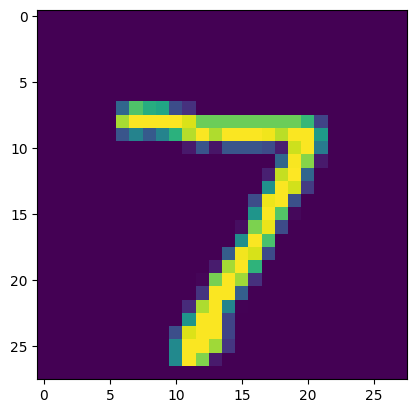

In [17]:
# first data point in t_test
plt.imshow(x_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [19]:
y_pred=model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


In [20]:
print(y_pred.shape)

(10000, 10)


In [21]:
y_pred[0]

array([5.5487780e-04, 2.5879028e-01, 2.6274560e-02, 3.6482830e-02,
       1.0698369e-01, 1.6159255e-02, 8.6977147e-05, 9.9984443e-01,
       1.8805798e-02, 2.0358528e-01], dtype=float32)

model.predict() gives the prediction probability for each of the classes for the data point

In [22]:
# converting the prediction probability to class label

label_for_for_first_test_image=np.argmax(y_pred[0])
print(label_for_for_first_test_image)


7


In [23]:
y_pred_labels= [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y-test --> True Labels

y_pred_labels --> Predicted labels

Confusion Matrix

In [24]:
conf_mat=confusion_matrix(y_test,y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 969    0    1    1    0    1    5    0    2    1]
 [   0 1107    1    1    0    1    6    0   19    0]
 [   1    0 1017    3    1    0    0    2    8    0]
 [   0    0    1  997    0    2    0    3    3    4]
 [   1    0    3    0  967    0    6    1    0    4]
 [   3    0    0    5    1  877    4    0    2    0]
 [   2    1    1    0    2    3  949    0    0    0]
 [   1    4    8    1    1    0    0 1005    2    6]
 [   2    0    3    3    3    7    0    2  951    3]
 [   2    2    0    1   10    5    1    6    2  980]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'Truth')

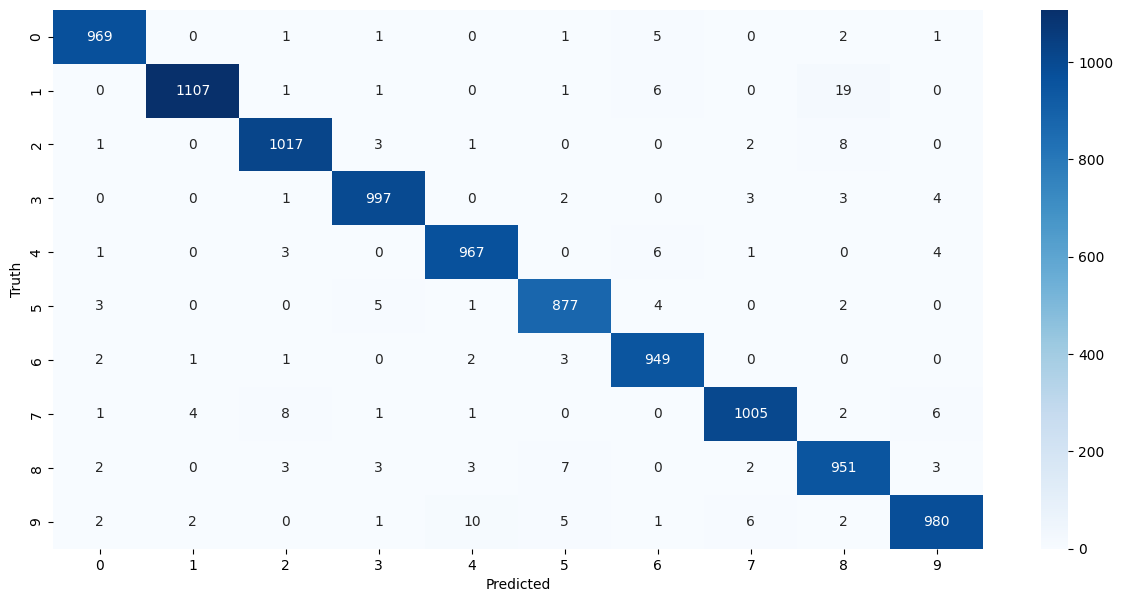

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Building a predictive system

In [27]:
input_image_path='/content/image3.png'

input_image=cv2.imread(input_image_path)


In [28]:
type(input_image)


numpy.ndarray

In [29]:
input_image.shape

(225, 224, 3)

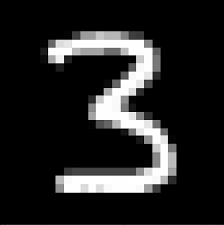

In [31]:
cv2_imshow(input_image)


In [30]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [32]:
grayscale.shape

(225, 224)

In [33]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [34]:
input_image_resize.shape

(28, 28)

In [35]:
cv2_imshow(input_image_resize)

In [37]:
type(input_image_resize)

numpy.ndarray

In [36]:
input_image_resize=input_image_resize/255

In [38]:
image_reshape=np.reshape(input_image_resize,[1,28,28])

In [39]:
input_prediction=model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 33ms/step
[[1.0427148e-03 2.8543934e-02 1.3534723e-01 9.9993098e-01 1.1646642e-02
  2.2865957e-01 2.4265263e-04 2.6939638e-02 2.4424136e-01 1.9686219e-01]]


In [41]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

3


**Prediction System**

Path of the image to be predicted/content/image7.png


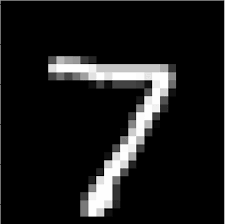

1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is 7


In [43]:
input_image_path=input('Path of the image to be predicted')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshape=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshape)

input_pred_label=np.argmax(input_prediction)

print('The Handwritten Digit is',input_pred_label)